<a href="https://colab.research.google.com/github/NataliaCFreitas/Exerc-cios-Garcia/blob/main/Lista_1_Garcia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios

1) Melhore a acurácia do modelo visto acima (usar um modelo melhor).



*DATASET VINHO*

In [1]:
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
c = wine_quality.data.original.color
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [4]:
wine_quality.data.original

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["colors"] = c
print(X_scaled_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   ...   density        pH  sulphates   alcohol  colors  
0  ...  1.034993  1.813090   0.193097 -0.915464     red  
1  ...  0.701486 -0.115073   0.999579 -0.580068     red  
2  ...  0.768188  0.258120   0.797958 -0.580068     red  
3  ...  1.101694 -0.363868   0.327510 -0.580068     red  
4  ...  1.034993  1.813090   0.193097 -0.915464     red  

[5 rows x 12 columns]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,colors
3761,2.070989,0.913197,-0.609973,-0.639680,0.883966,-0.649386,-0.013174,0.034473,-2.789621,-0.613385,-0.915464,white
3740,0.373895,-0.362438,0.215866,2.071864,-0.000967,0.026746,0.022213,1.702006,0.320319,-0.210144,-0.747766,white
1359,3.382379,0.822080,0.559966,-0.849877,0.998151,-1.381861,-1.552520,0.781528,-0.923657,0.797958,-0.384420,red
1230,0.373895,-0.969884,0.147046,-0.576620,0.284496,-0.874763,-1.021711,0.001123,0.942306,1.671647,1.096912,red
4751,0.296754,-0.544672,6.272023,-0.177246,-0.600437,1.153631,3.153986,-1.506327,-1.172452,-0.680592,2.186949,white
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.296754,-0.119460,1.798725,2.376650,-0.172244,0.702877,0.836120,1.735356,-0.426067,0.058683,-1.083162,white
5191,-1.246058,-0.362438,-0.334694,-0.324384,-0.372068,1.209975,0.747652,-0.892675,0.817909,-0.613385,0.174573,white
5226,-0.628933,0.184263,-0.816433,0.032951,1.740353,1.717074,1.189993,-0.035563,0.133722,-0.680592,-0.831615,white
5390,-0.551792,-0.483928,1.248165,0.537425,-0.143698,0.871910,1.437704,0.221237,-0.239471,-0.411765,-0.831615,white


In [7]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,...,density,pH,sulphates,alcohol,colors
3103,-0.166089,-1.030629,2.899845,1.546371,-0.314975,...,-0.165631,0.258120,-1.016626,1.432308,white
1419,0.373895,1.824366,-0.747613,-0.681719,0.598504,...,0.301278,0.320319,-0.546178,-0.496219,red
4761,-0.320370,0.305752,0.147046,0.411306,-1.028631,...,-0.859324,-0.239471,-0.613385,1.264610,white
4690,-0.706073,-0.362438,1.041706,1.210056,-0.457706,...,0.408001,-0.612663,-0.142937,-0.831615,white
4032,0.142473,0.062773,-0.816433,1.777588,-0.058059,...,1.395180,-0.674862,-0.210144,-1.334709,white
...,...,...,...,...,...,...,...,...,...,...,...
4294,-1.168917,-0.666161,-0.265874,0.884250,-0.885900,...,-0.732592,0.382517,-1.016626,0.677667,white
3757,0.142473,-0.969884,-0.334694,-0.870896,-0.229336,...,-0.232332,1.875288,0.865165,0.090724,white
5954,-0.628933,-0.180205,-0.265874,-0.618660,-0.486252,...,-1.746451,0.009325,-1.016626,1.851553,white
4418,-0.937495,-0.787650,0.147046,-0.723758,-0.400614,...,-1.392935,1.377698,-0.747799,0.761516,white


In [8]:
y_train.quality.values

array([6, 5, 6, ..., 5, 5, 5])

# O modelo Bayesiano

In [9]:
df = X_train
fixed_acidity_train = df['fixed_acidity'].values
volatile_acidity_train = df['volatile_acidity'].values
citric_acid_train = df['citric_acid'].values
residual_sugar_train = df['residual_sugar'].values
chlorides_train = df['chlorides'].values
free_sulfur_dioxide_train = df['free_sulfur_dioxide'].values
total_sulfur_dioxide_train = df['total_sulfur_dioxide'].values
density_train = df['density'].values
pH_train = df['pH'].values
sulphates_train = df['sulphates'].values
alcohol_train = df['alcohol'].values
colors_train = df['colors'].values

Regressão

In [101]:
with pm.Model() as regression:
  betas = pm.Normal("betas",0,1,shape=9)
  alpha = pm.Normal("alpha",0,1)
  eps = pm.HalfNormal("eps",0.5)

  mu = alpha + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                #betas[7] * density_train +
                #betas[8] * pH_train +
                betas[7] * sulphates_train +
                betas[8] * alcohol_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

Teste de priores

In [102]:
with regression:
  trace_priori = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

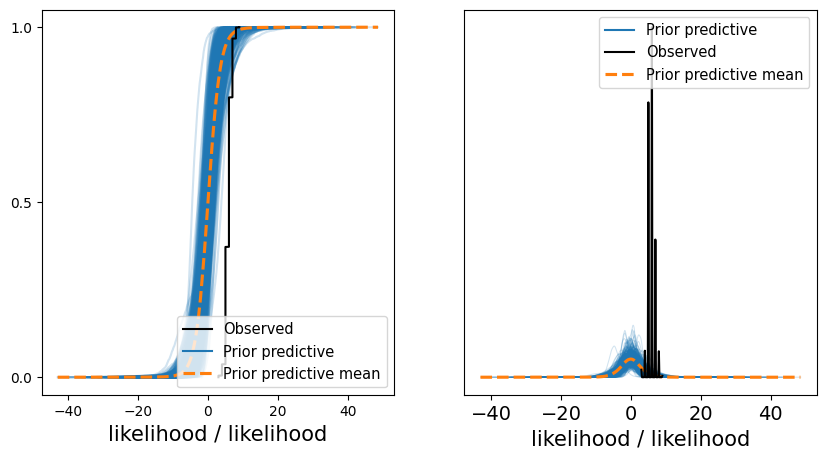

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori, group='prior',ax=axes[1])

In [104]:
with regression:
  trace_reg = pm.sample()

pm.summary(trace_reg)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.014,0.014,-0.012,0.042,0.0,0.0,2741.0,1746.0,1.0
betas[1],-0.246,0.015,-0.276,-0.220,0.0,0.0,2826.0,1634.0,1.0
betas[2],-0.025,0.014,-0.052,-0.002,0.0,0.0,2143.0,1783.0,1.0
betas[3],0.117,0.013,0.092,0.143,0.0,0.0,3215.0,1578.0,1.0
betas[4],-0.018,0.014,-0.045,0.008,0.0,0.0,2742.0,1589.0,1.0
betas[5],0.125,0.016,0.093,0.153,0.0,0.0,2932.0,1641.0,1.0
betas[6],-0.141,0.018,-0.174,-0.107,0.0,0.0,2370.0,1729.0,1.0
betas[7],0.105,0.012,0.081,0.126,0.0,0.0,3367.0,1589.0,1.0
betas[8],0.407,0.013,0.383,0.431,0.0,0.0,3209.0,1545.0,1.0
alpha,5.818,0.011,5.798,5.839,0.0,0.0,3713.0,1276.0,1.0


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

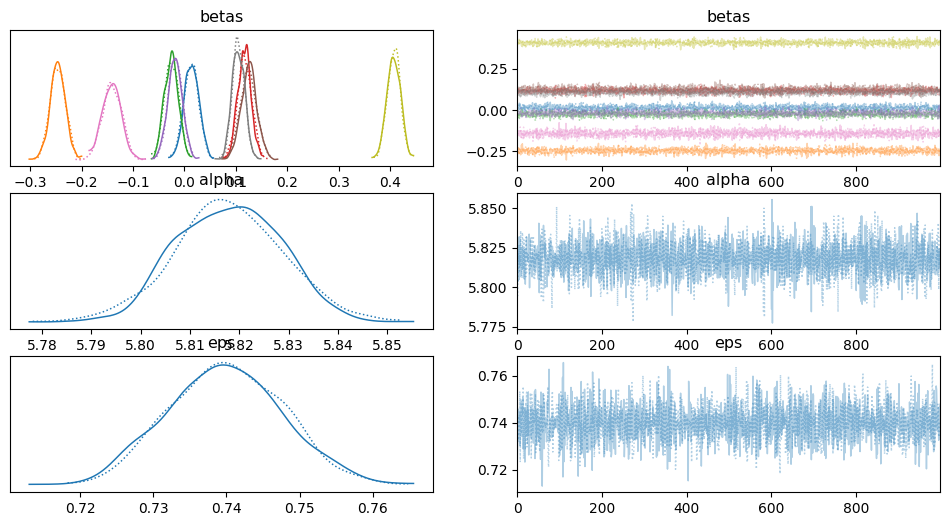

In [105]:
az.plot_trace(trace_reg)

In [106]:
with regression:
    trace_reg_post = pm.sample_posterior_predictive(trace_reg)

## Modelo hierarquico ou multi- nível

In [107]:
coords = {"colors":np.unique(colors_train)}
colors_idx = pd.Categorical(colors_train, categories=['red', 'white']).codes

with pm.Model(coords=coords) as regression_h:
  betas = pm.Normal("betas",0,1,shape=9)
  alpha = pm.Normal("alpha",0,1,dims="colors") #usar com label,troca por 0 e 1
  eps = pm.HalfNormal("eps",0.5)

  mu = alpha[colors_idx] + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                #betas[7] * density_train +
                #betas[8] * pH_train +
                betas[7] * sulphates_train +
                betas[8] * alcohol_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

# Aprendizado dos parâmetros do segundo modelo

In [108]:
with regression_h:
  trace_reg_h = pm.sample()

pm.summary(trace_reg_h)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.004,0.015,-0.026,0.030,0.000,0.000,1611.0,1546.0,1.0
betas[1],-0.262,0.017,-0.294,-0.232,0.000,0.000,1410.0,1564.0,1.0
betas[2],-0.022,0.014,-0.048,0.003,0.000,0.000,1537.0,1140.0,1.0
betas[3],0.119,0.013,0.093,0.143,0.000,0.000,2679.0,1436.0,1.0
betas[4],-0.024,0.014,-0.050,0.004,0.000,0.000,1713.0,1513.0,1.0
betas[5],0.119,0.017,0.089,0.150,0.000,0.000,1649.0,1318.0,1.0
betas[6],-0.117,0.022,-0.157,-0.074,0.001,0.000,1205.0,1322.0,1.0
betas[7],0.096,0.013,0.070,0.120,0.000,0.000,2002.0,1295.0,1.0
betas[8],0.412,0.014,0.389,0.439,0.000,0.000,1773.0,1506.0,1.0
alpha[red],5.903,0.045,5.818,5.987,0.001,0.001,991.0,1116.0,1.0


# Análise preditiva a posteriori do segundo modelo

In [109]:
with regression_h:
    trace_reg_post_h = pm.sample_posterior_predictive(trace_reg_h)

In [110]:
with pm.Model(coords=coords) as regression_h_2:
  betas = pm.Normal("betas",0,1,shape=(9,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",0.5)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                #betas[7][colors_idx] * density_train +
                #betas[8][colors_idx] * pH_train +
                betas[7][colors_idx] * sulphates_train +
                betas[8][colors_idx] * alcohol_train)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

In [117]:
with pm.Model(coords=coords) as regression_h_2_m:
  f_a = pm.MutableData("f_a", fixed_acidity_train)
  v_a = pm.MutableData("v_a", volatile_acidity_train)
  c_a = pm.MutableData("c_a", citric_acid_train)
  r_s = pm.MutableData("r_s", residual_sugar_train)
  chl = pm.MutableData("chl", chlorides_train)
  f_s_d = pm.MutableData("f_s_d", free_sulfur_dioxide_train)
  t_s_d = pm.MutableData("t_s_d", total_sulfur_dioxide_train)
  #den = pm.MutableData("den", density_train)
  #pH = pm.MutableData("pH", pH_train)
  sul = pm.MutableData("sul", sulphates_train)
  alc = pm.MutableData("alc", alcohol_train)
  c_i = pm.MutableData("colors", pd.Categorical(colors_train, categories=['red', 'white']).codes)
  y = pm.MutableData("y",y_train.quality.values)
  betas = pm.Normal("betas",0,1,shape=(9,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",0.5)

  mu = alpha[c_i] + (betas[0][c_i] * f_a +
                betas[1][c_i] * v_a +
                betas[2][c_i] * c_a +
                betas[3][c_i] * r_s +
                betas[4][c_i] * chl +
                betas[4][c_i] * f_s_d +
                betas[5][c_i] * t_s_d +
                #betas[7][c_i] * den +
                #betas[8][c_i] * pH +
                betas[6][c_i] * sul +
                betas[7][c_i] * alc)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y)

In [118]:
with regression_h_2_m:
  trace_m = pm.sample()

In [119]:
with regression_h_2_m:
    pm.set_data({
        "f_a": X_test.fixed_acidity.values,
        "v_a": X_test.volatile_acidity.values,
        "c_a": X_test.citric_acid.values,
        "r_s": X_test.residual_sugar.values,
        "chl": X_test.chlorides.values,
        "f_s_d": X_test.free_sulfur_dioxide.values,
        "t_s_d": X_test.total_sulfur_dioxide.values,
        #"den": X_test.density.values,
        #"pH": X_test.pH.values,
        "sul": X_test.sulphates.values,
        "alc": X_test.alcohol.values,
        "y": y_test.quality.values,
        "colors": pd.Categorical(X_test.colors.values, categories=['red', 'white']).codes
    })
    trace_post_m = pm.sample_posterior_predictive(trace_m)

In [130]:
trace_post_m

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [131]:
preds = trace_post_m.posterior_predictive["likelihood"].mean(["chain","draw"]).to_numpy()

In [132]:
rounded_preds = np.round(preds)

df_predictions = pd.DataFrame({
    'Predicted': rounded_preds,
    'Actual': y_test.quality.values
})

df_predictions['Abs_Difference'] = np.abs(df_predictions['Predicted'] - df_predictions['Actual'])

print(df_predictions.head())
print(df_predictions['Abs_Difference'].sum())

zero_diff_count = (df_predictions['Abs_Difference'] == 0).sum()
print(zero_diff_count)
print(zero_diff_count/len(y_test.quality.values))

   Predicted  Actual  Abs_Difference
0        7.0       8             1.0
1        5.0       5             0.0
2        6.0       7             1.0
3        6.0       6             0.0
4        5.0       6             1.0
979.0
1055
0.541025641025641
